In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
df=pd.DataFrame()
for i in range(5):
  df['Banner_type_'+str(i)]=np.random.randint(0,2,100000)
df

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,0,1,0,1
1,1,0,1,1,0
2,0,0,0,1,0
3,1,1,1,1,0
4,1,0,0,0,1
...,...,...,...,...,...
99995,1,1,0,1,1
99996,1,0,1,1,0
99997,0,0,1,1,1
99998,0,1,0,1,1


In [3]:
num_iter=100000
num_banner=5

Number of times a banner was clicked

In [4]:
count= np.zeros(num_banner)

Sum of rewards obtained from each banner

In [5]:
sum_rewards=np.zeros(num_banner)

Mean reward of each banner

In [6]:
Q=np.zeros(num_banner)

Selected banner

In [7]:
selected_banner=[]

## Define the UCB method

In [8]:
def UCB(i):
  ucb=np.zeros(num_banner)
  if i< 2:
    return i
  else:
    for arm in range(num_banner):
      ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])
    return np.argmax(ucb)

## Start pulling the arm

In [9]:
for i in range(num_iter):
    banner =UCB(i)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)

<ipython-input-8-714fb36eaa50>:7: RuntimeWarning: divide by zero encountered in double_scalars
  ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])


In [10]:
print(Q)

[0.50259067 0.49701989 0.49949909 0.49769703 0.48930313]


In [11]:
print("Optimal banner is ",np.argmax(Q)+1)

Optimal banner is  1


## Plot

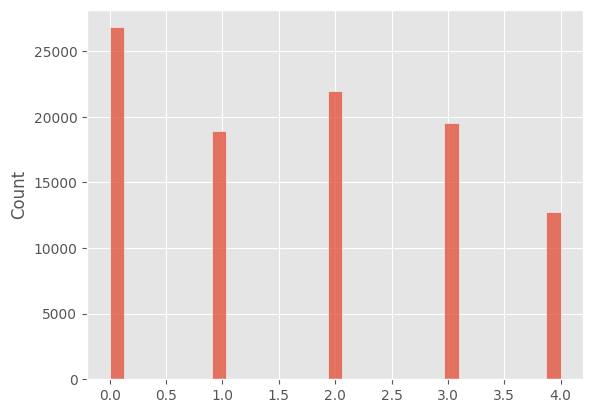

In [12]:
ax=sns.histplot(np.array(selected_banner))
plt.show()